# Milestone 2 Documenation: Group 6

**Team Members:**  
Kyra Ballard - *S.M. Applied Computation*  
Paul-Emile Landrin - *S.M. Applied Computation*  
Yaoyang Lin - *S.M. Applied Computation*  
Dan Park - *MS/MBA*  

CS 207 - Systems Development for Computational Science (Fall 2019)

# Introduction

This project aims to provide a working library for automatic differentiation. Automatic differentiation is a method for numerically calculating the derivative of a function. Derivative calculations are essential in many modern numerical algorithms, and automatic differentiation is one method that can quickly compute derivatives by executing elementary functions via the chain rule. 

Compared to other differentiation methods (such as symbolic/analytic differentiation or numerical differentiation), automatic differentiation boasts more efficient calculations and high accuracy to working precision. Symbolic differentiation requires mathematical expressions of derivatives to be kept throughout the process, which can lead to inefficient code. Numerical differentation is heavily reliant on an optimal value of `h`--too small or big values of `h` can lead to large floating point errors or inaccuracy, respectively. Therefore, automatic differentic differentiation provides efficiency and accuracy advantages (in most cases).

# Background

As mentioned above, automatic differentiation (AD) revolves around the fact that any complex function can be decomposed into elementary functions. As such, derivatives for a complex function can be computed from the derivatives of each elementary function, via the chain rule:

\begin{equation}
\frac{df_1}{dx} = \frac{df_1}{df_2} \frac{df_2}{df_3} ... \frac{df_{n}}{dx}
\end{equation}

This can be generalized to functions of multiple variables, where a Jacobian matrix of partial derivatives are used instead:

\begin{equation}
\textbf{J}=\begin{bmatrix}\frac{\partial f_1}{\partial x_1}&\frac{\partial f_1}{\partial x_2}&\dots&\frac{\partial f_1}{\partial x_n}\\\frac{\partial f_2}{\partial x_1}&\frac{\partial f_2}{\partial x_2}&\dots&\frac{\partial f_2}{\partial x_n}\\
\vdots&\vdots&&\vdots\\\frac{\partial f_m}{\partial x_1}&\frac{\partial f_m}{\partial x_2}&\dots&\frac{\partial f_m}{\partial x_n}\\\end{bmatrix}
\end{equation}

There are two main methods for automatic differentiation: 1) forward-mode and 2) reverse-mode. In forward-mode, the derivative is calculated "inside-out" (from the independent variable to the outermost function). In reverse-mode, the derivative is calculated "outside-in". We will focus mostly on forward-mode automatical differentiation for our project.

AD keeps track of the elementary functions, their derivatives, and the value of the derivative at the given x-value. These functions and values can be summarized in a table called the evaluation trace. By evaluating the derivative at each step, we can compute the value of the derivative at the given x-value. The composition of elementary functions can also be visualized in an evaluation graph.

To illustrate the above, we present an example: 

\begin{equation}
f(x) = 2x^2 + \sin(y)
\end{equation}

at $(x,y) = (4, \frac{\pi}{2})$

This equation has the following evaluation trace:

| Trace   | Elementary Function      | Current Value           | Elementary Function Derivative       | $\nabla_{x}$ Value  | $\nabla_{y}$ Value  |
| :---: | :-----------------: | :-----------: | :----------------------------: | :-----------------:  | :-----------------: |
| $x_{1}$ | $x_{1}$                  | $4$                     | $\dot{x}_{1}$                        | $1$ | $0$ |
| $x_{2}$ | $x_{2}$                  | $\dfrac{\pi}{2}$        | $\dot{x}_{2}$                        | $0$ | $1$ |
| $x_{3}$ | $x_{1}^2$                | $16$                    | $2x_1\dot{x}_{1}$                    | $8$ | $0$ |
| $x_{4}$ | $2x_{3}$                 | $32$                    | $2\dot{x}_{3}$                       | $16$| $0$ |
| $x_{5}$ | $\sin(x_{2})$            | $1$                     | $\cos(x_2)\dot{x}_{2}$               | $0$ | $1$ |
| $x_{6}$ | $x_{4} + x_{5}$          | $33$                    | $\dot{x}_{4}+\dot{x}_{5}$            | $16$| $1$ |

The function can be visualized with the following evaluation graph:
![evaluation_graph.png](./image_m2/evaluation_graph.png)

In execution, forward-mode AD actually computes $\nabla f \cdot p$. However, this needs to be calculated for each seed vector (there is one seed vector for each input variable). Therefore, the computational complexity of forward-mode AD is proportional to the number of input variables. Forward-mode automatic differentiation is more efficient for functions where $ m >> n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $



For Milestone 2, forward mode has been partially implemented. *OttoDiff* currently supports multiple input variables, but does not allow for multiple functions. In other words, for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $, $n$ can be greater than 1, but $m$ cannot be greater than 1. The final submission will improve upon our current implementation to remove this limitation.

# How to Use *OttoDiff*

### How to install

#### Use pip to install

Our package has been posted to **PyPI** as `OttoDiff` to make installation easy for users. Users are allowed to install the package by typing the following command.

`pip install OttoDiff`


The file `requirements.txt` contains dependent packages that the user needs to be able to run OttoDiff (such as numpy>=1.14.3).

#### Install manually in Virtual Environment

User are also allowed to install the package following these steps:

1. Set up a virtual environment: `virtualenv env`
2. Activate the virtual environment: `env/bin/activate`
3. Clone the repo by `git clone https://github.com/CreativeAutomaticDifferentiators/cs207-FinalProject.git`
4. `cd cs207-FinalProject`
5. Install all of the dependencies packages required for this project: `pip install -r requirements.txt`
6. install OttoDiff by : `pip install -e`
7. Quit by : `deactivate`

### Demo: How to use OttoDiff to calculate derivatives

The user should first import the package to use it:

`import OttoDiff`

In [6]:
# Not needed if user successfully install the package
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd() , '..')))

import numpy as np
import OttoDiff.forward.forward as fw

Here's a basic demo about how to use the Package for three different cases:
### Univariate derivative calculation

The core class of the forward mode is `Variable`, which stores both the value and the partial derivatives of a variable (expression). User can define any functions f(x) which made by any operations of x. And the derivative and value of f(x) would be automaticly calculated and been stored in the `val` and `der` attribute of the `Variable` during the forward process. Because the operator is overloaded and a new return 

For example, user create an function $f(x) = \ln(x) + 3x + 1$, we can manually calculate its derivative $f'(x) = \frac{1}{x} + 3$. When $x = 2$, we know that $f(x) = \ln(2) + 7 = 7.6931$ and $f'(x) = 3.5$.

The calculation would be much easier if our package is used. The user just need to create the `Variable` x first by `x = fw.Variable(x_val)`, use the operations of `Variable` x to create a function f(x). Then the value and derivative would be automatically stored in the attributes of f(x) and user can easily check them by print.

In [7]:
x = fw.Variable(2)
f_x = np.log(x) + 3*x + 1
print(f_x)

val: 7.693147180559945 der: 3.5


### Mutivariate derivative calculation

The current implementation also support mutivariate derivative calculation. Most part usage is similar but the user has to initialize the partial derivatives for this usage. 

For example, user create an function $f(x, y) = \ln(x) + 3y + 1$, we can manually calculate its partial derivative $\frac{\partial f}{\partial x} = \frac{1}{x}$ and $\frac{\partial f}{\partial y} = 3$. When $x = 2, y = 1$, we know that $f(x) = \ln(2) + 4 = 4.6931$ and $\frac{\partial f}{\partial x} = 0.5$ and $\frac{\partial f}{\partial y} = 3$.

One thing the user need to pay attention is that when they created `Variable`. They need to make sure the der is a numpy array (length = number of variables in the equations). Each element of the array represents a unique variable. And finally the package will also return the partial derivative as the same order user defined, in this case $[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]$.

In [8]:
x = fw.Variable(2, np.array([1, 0]))
y = fw.Variable(1, np.array([0, 1]))

f = np.log(x) + 3*y + 1
print(f)

val: 4.693147180559945 der: [0.5 3. ]


For user convience, in the future we decided to add one more class `AutoDiffFwd` to manage these `Variable` so that user does not need to specify the partial derivatives when they created a new Variable. We would discuss this plan with more detail in the implementation section.

### Mutivariate Vector Functions

At this point, this feature is not supported in our current implementaion because we make the assumption that val is a scalar instead of vector for the simplication purpose. But we expect to support this feature in the final release.
It is expected to be used in following way:
```
f = x * y
g = x + y
F = AutoDiffFwd.combine([f,g])
F.get_jacobian()
```
\begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}

### Demo: How to use OttoDiff for root-finding algorithm (e.g. Newton's method)

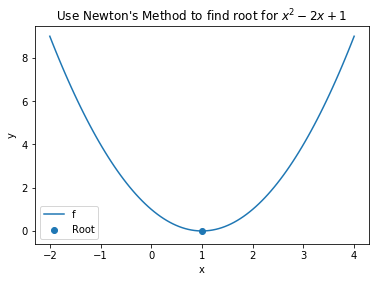

In [42]:
from matplotlib import pyplot as plt

def newtons_method(f, x, tolerance=1e-6):
    '''f is the function f(x)'''
    while True:
        df = f(fw.Variable(x))
        x1 = x - (f(x) / df.der)
        t = abs(x1 - x)
        if t < tolerance:
            break
        x = x1
    return x

f = lambda x: x**2-2*x+1
sol = newtons_method(f, -1)

xs = np.linspace(-2,4,100)
plt.plot(xs, f(xs), label="f")
plt.scatter(ans, f(sol), label="Root")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Use Newton's Method to find root for $x^2 - 2x + 1$")
plt.legend()
plt.show()

# Software Organization


Directory structure is okay, but module description, packaging, and distribution sections were too brief. Make sure you know the procedure for actually packaging your software.




We will use the following directory structure:
```
cs207-FinalProject/
	OttoDiff/
        forward/
            forward.py
        tests/
            test_forward.py
	docs/
        milestone1.md
        milestone2.ipynb
        image_m2/
            evaluation_graph.png
	.travis.yml
	README.md
	requirements.txt
	setup.py
```

### Directory structure

1 OttoDiff/

The `OttoDiff` directory contains the different code modules. For this milestone, it contains the forward-mode implementation in the `forward` folder, and the corresponding test in the `tests` folder. For future submissions, the folder will contain a `reverse` folder for the reverse-mode implementation and its test.

2 docs/

The `docs` directory contains the documentations correpond to each milestone. Milestone 2 documentation (this document) was submitted as a python notebook, to demonstrate in-line demos for how to use our package. There is also a `evaluation_graph.png` image that is referenced in this documentation.

3 ./

The root directory of `cs207-FinalProject` contains the following additional files for installation and configuration:
* `.travis.yml` - contains our configuation for TravisCI and CodeCov
* `README.md` - contains basic information about our project (members, group number, etc.). Also has badges to help us easily understand code coverage and build pass/fail info.
* `requirements.txt` - outlines dependencies on other packages for our project. Mainly `python`, `numpy`, and `math`.
* `setup.py` - a python file that configures installation with `pip`. 

### Basic modules and functionality

Currently, the only implemented module in the package is `forward`: It contains the implementaion of class `Variable`, which is the core class for calculating the value and derivative of any variable (expression) by overloading the basic operators. We plan to include one extra class in this module in the future: `AutoDiffFwd`. It will serve as management class to handle the case of mutiple Variables and vector functions.

There is another module we plan to add in the future: `backward`: It would include classes used for reverse mode. The class proposed to include in this module is `Graph`. It would be used to build the computational graph required by reverse mode. And also a base class `Node` used to build the graph.

### Testing

Our tests are contained in test directory in modules.

test_forward.py: It includes tests for scalar functions of Variable such as (+, -, *, /) is succusfully overloaded by own implementation. It also make sure that the exponential and trig functions of numpy is also overloaded by our implementation. It checks that the calculation of expression of variable and derivative is correct by manual calculation. It also ensure that an useful error message is raised when user type in invalid input.

We used Travis CI and CodeCov to keep track of the testing progress. We have already set up these integrations, which can be visualized by the badges in the README.md. It shows that our tests covers 98% of the code now.

If user are intrested in adding more tests and run their self-defined test, they can add them in the file test_forward.py and run the command: `python -m pytest ./forward/tests/test_forward.py`


### Packaging

We follow instructions on https://packaging.python.org/tutorials/packaging-projects/ to package our code and distribute it on PyPI. We use `twine upload dist/*` to upload our package. Details about how to install the package are discussed in the previous section.

# Implementation

### Overview

In the forward mode, we implemented a Variable class. An object of this class as two attributes val and der which stands for the value and the derivatives. We can then do some operations on this variable like addition, multiplication, or composition. This will generate another variable with updated values and derivatives. 

If we want to calculate the gradients of an expression with several variables (function with several inputs), we need to specify the derivative as an array whose only coefficient that is non-zero is the coefficient of the index of that variable. For example, if you want to use two variables you need to declare the variables as follow, the two derivatives that you would put in the Variable will be the arrays [1,0] and [0,1]. The instructions and examples about how to use it can be found in previous sections.

### Core data structures

List and Numpy array: In our current implementation, array is the only data structure we heavily used. Use a numpy array which length equal to the number of variables to store partial derivatives. We would also use a numpy array which length equal to the number of vector length to store vector function inputs.

Dictionary and hashmap: We plan to use that data structure in our future implementaion for manangement of mutiple Varibles and vectore functions. It can be used to record the mapping relationship between the index of variable in the list and its name. For example, for dict var2index = {x:0, y:1, z:2} and partial derivatives [1, 2, 3]. We know that $\frac{\partial f}{\partial x} = 1$, $\frac{\partial f}{\partial y} = 2$, $\frac{\partial f}{\partial z} = 3$

### Core class
The core class of our implementaion is `Variable`:

#### Important attributes

The core class `Variable` has two important attributes:

val: int/float, (or np.array in the future if vector function allowed), values of variables for differentiation
     
der: int/float or np.array if mutiple variable, derivative (partial derivatives) of variables for differentiation. If it is an array, each entry represents an partial derivatives [$\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, $\frac{\partial f}{\partial z}$, ...]

#### Methods
The following methods is implemented for the Variable class to overload the original operators:

`__init__`: initialize a Variable class object, user inputed value is required, which stored as float/int for current implementation (would extend to array in the future). Derivatives initialization is optional, It would be setted to 1 if the user do not specify about it.

`__neg__`: overload negitive function

`__str__`: overload the defult str method, by calling `print(self)`, an help message `val: [value] der: [Derivatives]` would be printed.

`__add__`: overload add function to handle addition of two Variable class objects or addition of Variable and a number.

`__radd__`: right addition similar to `__add__`.

`__sub__`: overload minus function to handle subtraction of two Variable class objects or subtraction of Variable and a number.

`__rsub__`: right subtraction similar to `__sub__`.

`__mul__`: overload multiplication function to handle multiplication of two Variable class objects or multiplication of Variable and a number.

`__rmul__`: right multiplication similar to `__mul__`.

`__truediv__`: overload division function to handle division of two Variable class objects or division of Variable and a number.

`__rtruediv__`: right division similar to `__truediv__`.

We also overloaded several function of the numpy library, these functions can be called by `np.sin(Variable)`

`sin()`

`cos()`

`tan()`

`arcsin()`

`arccos()`

`arctan()`

`arcexp()`

`log()`


### External dependencies

Numpy: used for mathematical calculations. We rely on the numpy library for implemented the following elementary functions: power, exponential, logarithm, sinus, cosinus, tangente, arcsinus, arccosinus and arctangente. 

pytest: used to create simple as well as complex functional test cases.

TravisCI and Codecov: used for test integration and coverage check.




### Future Implementation

##### Better Support for mutivariate and vector functions:

As we mentioned before, in the future, we plan to find a method to avoid having to declare the number of variables for an expression. Current plan is to add one more Class in the Forward mode, it would support to combine mutiple functions together to handle vector functions and record the number variables to initialize the derivatives dimensions so that the user does not need to do the derivative initialization for mutivirable cases. It would also record the mapping of variable name and index in the array.

```
class AutoDiffFwd:
    def __init__(self, n):
        self.num_variables = n
        self.var2index = {}
        
    def combine(self, list_funs):
        """
            Return a vector function variable given a list of non-vector function variables
        """
```

And we also want to modify the val attribute of the Variable Class to make it support vector functions.

##### Reverse mode:

For reverse mode, we would try to implement two class `Node`, `Graph` in order to build the comutational graph.

Similar to Variable, we plan to also support operator overloading for Node class. And we plan to implement forwardProp and backwardProp functions also. We are still in the progress of finalizing our design choice. Here's some rough ideas.

```
class Node:
    def __init__(self, val, grad):
        self.val = val
        self.grad = grad
        
    def forwardProp(self):
        ...
        
    def backwardProp(self):
        ...
        
    def __add__(self, other):
        ...
        
    def __sub__(self):
        ...
    ...
```

# Future Features

For the final submission, we want improve upon and finalize our forward mode implementation. The current revision already can handle functions of multiple variables, but we want to generalize it to multi-dimension functions. The input variables could be vector or tensors. The returned jacobian should have one additional dimension to enable multi-dimension functions. We will add new basics differentiable functions that could for example be the determinant, the trace, matrix multiplications, norms or the inverse.

For our advanced feature, we plan on implementing the reverse mode. We believe that this is a good complement to the forward mode so that we can compare the accuracy of the outputs and the efficiency in computing them, under different conditions. Theretically, the two modes should yield the same answer (the true derivative value at a given point), but because they utilize different methods to calculate the derivative, they will have slightly different precisions. 

As mentioned above, forward-mode calculates the derivative "inside-out" (from the independent variable to the outermost function) using the chain rule, and the reverse-mode calculates the derivative "outside-in". For example, consider the following function:

\begin{equation}
y = f(g(h(x)))
\end{equation}

The derivative of the function above would be:

\begin{equation}
\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dw}\frac{dw}{dx}
\end{equation}

where $w = h(x)$ and $u = g(h(x))$.

In forward mode, the the sweep starts from calculating $\frac{dw}{dx}$, then $\frac{du}{dw}$, then $\frac{dy}{du}$ (inside-out). Forward-mode is advantageous in cases where $ m >> n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $ for reasons described in the **Background** section. 

In reverse-mode, there are two sweeps. The first sweep is a forward sweep that calculates the function values and partial derivatives at each intermediate step. The second sweep is a reverse sweep that starts from $\frac{dy}{du}$, then $\frac{du}{dw}$, then $\frac{dw}{dx}$ (outside-in) to compute the numerical values of the partial derivatives. We start with:

\begin{equation}
\bar{x}_{N} = \frac{\partial f}{\partial x_N} = 1
\end{equation}

Then we start sweeping inwards:

\begin{equation}
\bar{x}_{N-1} = \frac{\partial f}{\partial x_N} \frac{\partial x_N}{\partial x_{N-1}}
\end{equation}

The reverse mode actually computes $\textbf{J}^T p$. As such, reverse-mode requires the storage of intermediate variables $(u, w,$ etc.$)$. Therefore, the computational complexity is proportional to the number of functions (i.e. for cases in which $ m << n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $)

